# Projeto final de Disciplia
### Dísciplina: Álgebra Linear Computacional
### Orientador: Prof. Miguel Aroztegui
### Autores: Guilherme Iram, Guilherme Pujoni

## 1 - Introdução

O objetivo desse trabalho é resolver problemas de regressão utilizando mínimos quadrados. Nesta primeira abordagem, iremos utilizar uma aproximação por polinômios. E à vista disso, criaremos uma função preditora e a avaliaremos a sua qualidade por meio de uma medida de desempenho.

## 2 - Métodos

### Regressão pilinomial

Como já descrito na introdução, utilizaremos técnicas de regressão para concluir nosso objetivo. A fórmula de uma função de regressão pode ser vista abaixo:

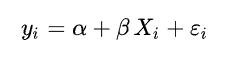

onde:

${\displaystyle y_{i}}$ : Variável explicada (dependente); representa o que o modelo tentará prever

${\displaystyle \alpha }$ : É uma constante, que representa a interceptação da reta com o eixo vertical;

${\displaystyle \beta }$ : Representa a inclinação (coeficiente angular) em relação à variável explicativa;

${\displaystyle X_{i}}$ : Variável explicativa (independente);

- No nosso caso, como estamos tratando de uma regressão polinomial, teremos mais de 1 coeficiente e variável explicativa como insumo para nossa função preditora.

### Minimos quadrados e R²

O alvo da nossa análise sempre será minimizar a norma (distancia) entre o valor da função preditora ("y chapeu") e o y original utilizado para calcular os coeficientes tetas (ou betas, símbolos diferentes para o mesmo elemento). Em virtude disso, o método que adotamos como medida de ajuste do nosso modelo são os mínimos quadrados, cuja fórmula está descrita abaixo: 

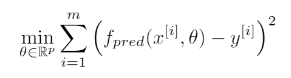

E como medida de desempenho cabal para avaliar a qualidade do modelo iremos utilizar o coeficiente de determinação (R²), que é um número entre 0 e 1 que mede quão bem um modelo estatístico prevê um resultado.

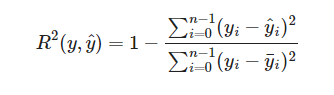

## 3 - Código

## 3.1 - Carregando as bibliotecas e o dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dados = pd.read_csv("./dados/dataset01.txt",sep=' ')

In [3]:
dados.head()

,x,y
0,-10.00,-0.15
1,-9.59,0.56
2,-9.18,-0.33
3,-8.78,0.26
4,-8.37,-0.26


In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       50 non-null     float64
 1   y       50 non-null     float64
dtypes: float64(2)
memory usage: 928.0 bytes


In [5]:
dados.describe()

,x,y
count,5.000000e+01,50.000000
mean,7.105427e-17,0.955000
std,5.949756e+00,1.155661
min,-1.000000e+01,-1.320000
25%,-4.997500e+00,0.095000
50%,0.000000e+00,0.685000
75%,4.997500e+00,1.840000
max,1.000000e+01,4.090000


## 3.2 - Análise exploratória e vizualização dos dados

In [6]:
X, y = np.array(dados['x']), np.array(dados['y'])
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

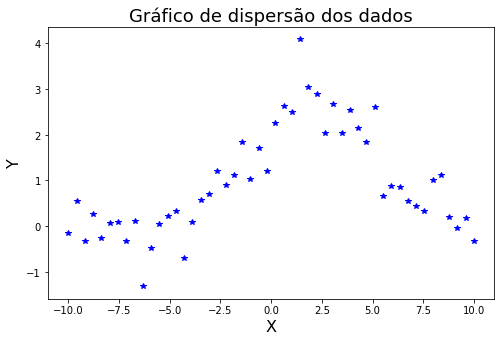

In [7]:
plt.figure(figsize=(8, 5))
plt.title("Gráfico de dispersão dos dados", fontsize=18)
plt.xlabel("X", fontsize=16)
plt.ylabel("Y", fontsize=16)
plt.plot(X, y, '*b')
plt.show()

## 3.3 - Aplicando Regressão Polinomial

- Punção preditora (fpred)

In [8]:
def fpred(x, teta, u):
    l = []
    for i in x:
        l.append(sum(i * teta))
    return np.array([sum(y) + u for y in l])

- coeficiente de determinação (R²)

In [9]:
def R2(y0, ypred):
    return (1 - ( sum((y0 - ypred) ** 2) / sum((y0 - y0.mean()) ** 2)) )

In [10]:
R2_resultado = {}

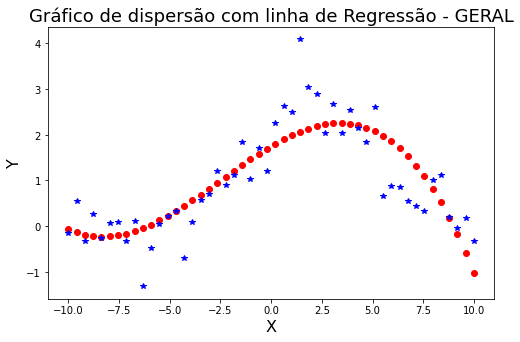

Coeficientes e medida de desemprenho (R2)
teta3 = [-0.00311704]
teta2 = [-0.02290078]
teta1 = [0.26312635]
u (intercepto) = [1.74946465]
R² = [0.70041989]


In [11]:
m = X.shape
a1 = np.ones(m)
a2 = X
a3 = X**2
a4 = X**3

A = np.column_stack((a1,a2,a3,a4))
b = y
teta = np.linalg.solve(A.T@A, A.T@b)
fpoli = lambda x: teta[0] + teta[1] * x + teta[2] * x**2 + teta[3] * x**3
ypred = fpoli(X)

plt.figure(figsize=(8, 5))
plt.title("Gráfico de dispersão com linha de Regressão - GERAL", fontsize=18)
plt.xlabel("X", fontsize=16)
plt.ylabel("Y", fontsize=16)
plt.plot(X, ypred,'or', X, y, '*b')
plt.show()

print("Coeficientes e medida de desemprenho (R2)")
print('teta3 =', teta[3])
print('teta2 =', teta[2])
print('teta1 =', teta[1])
print('u (intercepto) =', teta[0])
print('R² =', R2(y, ypred))

R2_resultado["Geral"] = R2(y, ypred)

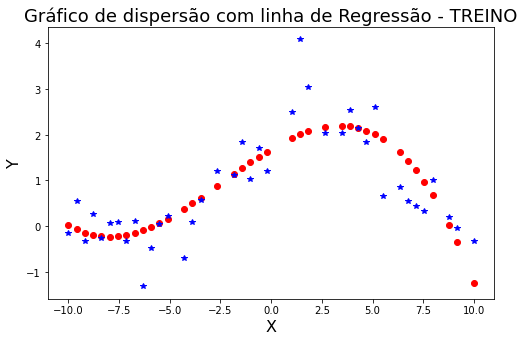

Coeficientes e medida de desemprenho (R2)
teta3 = [-0.00330749]
teta2 = [-0.02297773]
teta1 = [0.26710152]
u (intercepto) = [1.68705896]
R² = [0.69568171]


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

m = X_train.shape
a1 = np.ones(m)
a2 = X_train
a3 = X_train**2
a4 = X_train**3

A = np.column_stack((a1,a2,a3,a4))
b = y_train

teta = np.linalg.solve(A.T@A, A.T@b)
fpoli = lambda x: teta[0] + teta[1] * x + teta[2] * x**2 + teta[3] * x**3
ypred = fpoli(X_train)

plt.figure(figsize=(8, 5))
plt.title("Gráfico de dispersão com linha de Regressão - TREINO", fontsize=18)
plt.xlabel("X", fontsize=16)
plt.ylabel("Y", fontsize=16)

plt.plot(X_train, ypred,'or', X_train, y_train, '*b')
plt.show()

print("Coeficientes e medida de desemprenho (R2)")
print('teta3 =', teta[3])
print('teta2 =', teta[2])
print('teta1 =', teta[1])
print('u (intercepto) =', teta[0])
print('R² =', R2(y_train, ypred))

R2_resultado["Treino"] = R2(y_train, ypred)

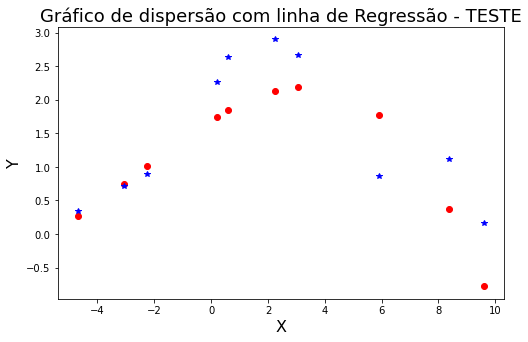

Medida de desemprenho (R2)
R²= [0.59255494]


In [13]:
ypred = fpoli(X_test)

plt.figure(figsize=(8, 5))
plt.title("Gráfico de dispersão com linha de Regressão - TESTE", fontsize=18)
plt.xlabel("X", fontsize=16)
plt.ylabel("Y", fontsize=16)

plt.plot(X_test, ypred,'or', X_test, y_test, '*b')
plt.show()

print("Medida de desemprenho (R2)")

print('R²=', R2(y_test, ypred))
R2_resultado["Teste"] = R2(y_test, ypred)

## 3.4 - Comparando Regressões Polinomiais

- Para executar a comparação de desempenhos das regressões polinomias iremos utilizar a biblioteca sklearn como apoio.
- fonte da documentação: https://scikit-learn.org/

In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

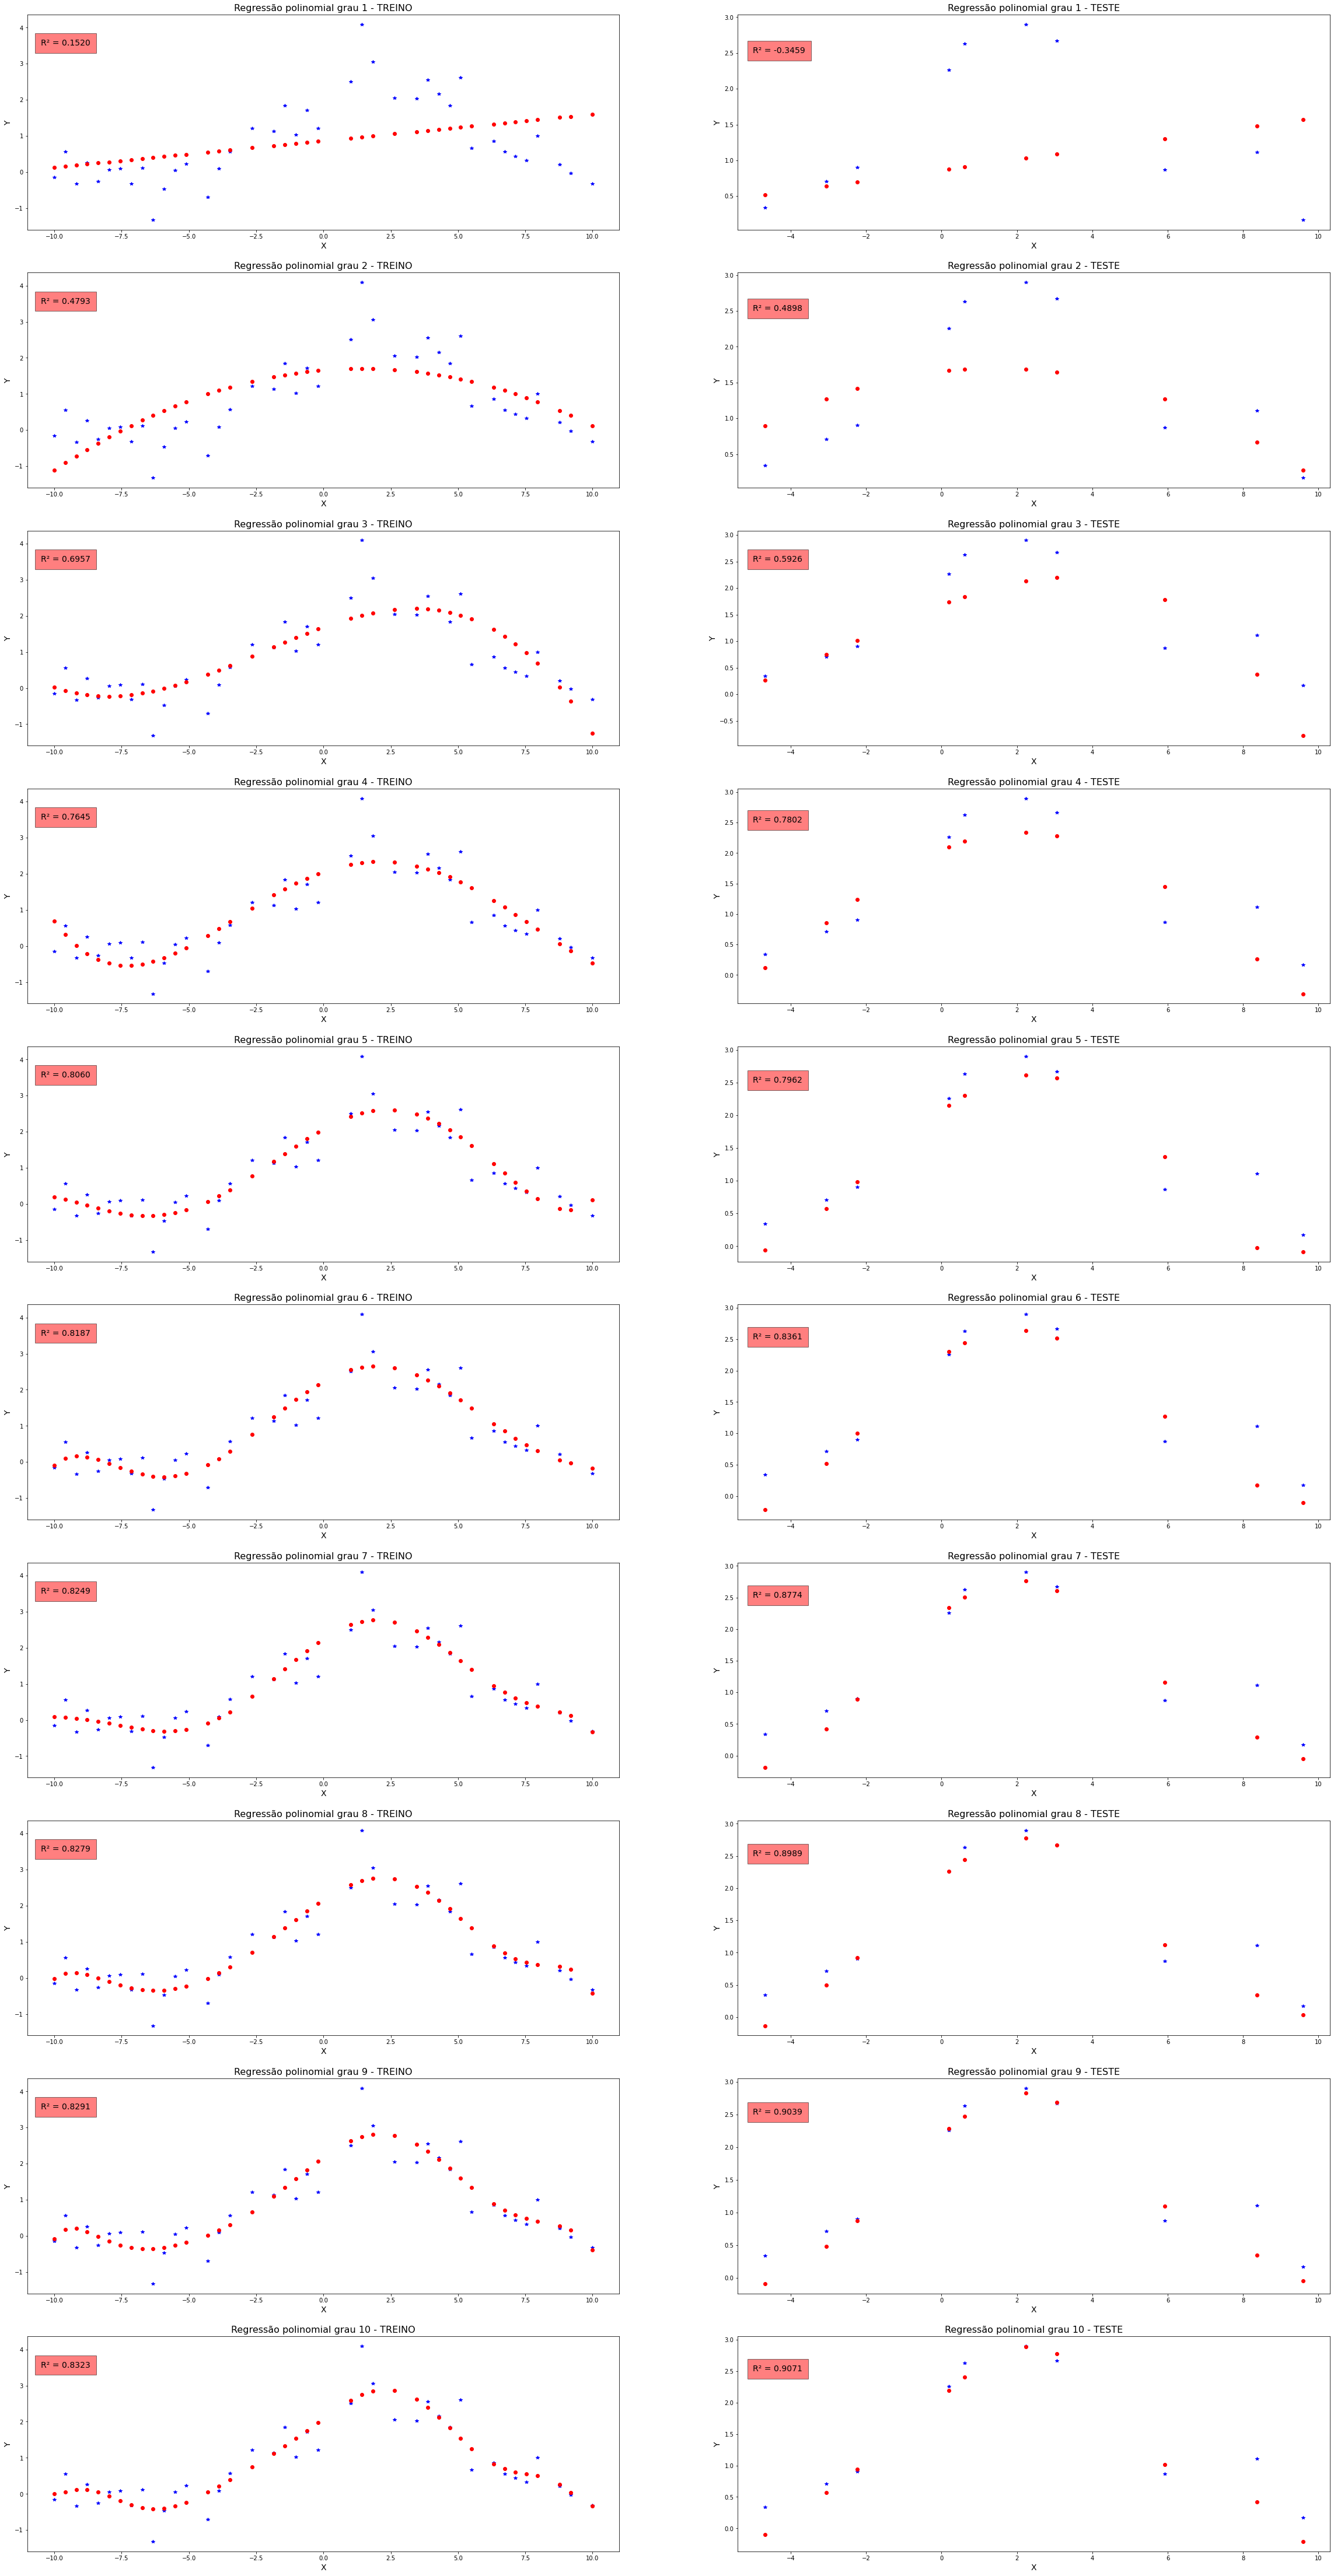

In [15]:
max_poli = 10
ax = plt.figure(figsize=(40, 80)).subplots(max_poli, 2)
R2_resultado_modelos = {}
res = {"R² - Treino": {}, "R² - Teste": {}}

for i in range(max_poli):

    poly_features = PolynomialFeatures(degree=i + 1, include_bias=False)
    X_poly = poly_features.fit_transform(X_train)
    modelo = LinearRegression()
    modelo.fit(X_poly, y_train)
    teta = modelo.coef_
    u = modelo.intercept_
    ypred = fpred(X_poly, teta, u)
    
    for j in range(2):
        ax[i, j].set_title(f"Teste {i}{j}", fontsize=16)
        ax[i, j].set_xlabel("X", fontsize=14)
        ax[i, j].set_ylabel("Y", fontsize=14)
        
        if j == 1:
            X_poly = poly_features.fit_transform(X_test)
            ypred = fpred(X_poly, teta, u)
            R2_atual = R2(y_test, ypred)[0]
            ax[i, j].text(-5, 2.5, f"R² = {R2_atual:.4f}", fontsize=14, bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})
            ax[i, j].set_title(f"Regressão polinomial grau {i+1} - TESTE", fontsize=16)
            ax[i, j].plot(X_test, y_test,'*b', X_test, ypred, "or")
            res["R² - Teste"][f"Grau {i+1}"] = R2_atual
            continue
            
        R2_atual = R2(y_train, ypred)[0]
        ax[i, j].text(-10.5, 3.5, f"R² = {R2_atual:.4f}", fontsize=14, bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})
        ax[i, j].set_title(f"Regressão polinomial grau {i+1} - TREINO", fontsize=16)
        ax[i, j].plot(X_train, y_train,'*b', X_train, ypred, "or")
        res["R² - Treino"][f"Grau {i+1}"] = R2_atual
        
plt.show()

## 4 - Análise dos resultados

### 4.1 - Organização e visualização dos resultados

In [16]:
print("Resultado da análise do polinômio de grau 3 proposto pelo problema: \n")
for k, v in R2_resultado.items():
    print(f'R² - {k}: {v[0]:.4f}')

Resultado da análise do polinômio de grau 3 proposto pelo problema: 

R² - Geral: 0.7004
R² - Treino: 0.6957
R² - Teste: 0.5926


In [17]:
comparacao_reg_df = pd.DataFrame(res)
comparacao_reg_df

,R² - Treino,R² - Teste
Grau 1,0.152036,-0.345856
Grau 2,0.479330,0.489756
Grau 3,0.695682,0.592555
Grau 4,0.764527,0.780217
Grau 5,0.805986,0.796206
Grau 6,0.818746,0.836141
Grau 7,0.824895,0.877360
Grau 8,0.827888,0.898939
Grau 9,0.829094,0.903876
Grau 10,0.832331,0.907091


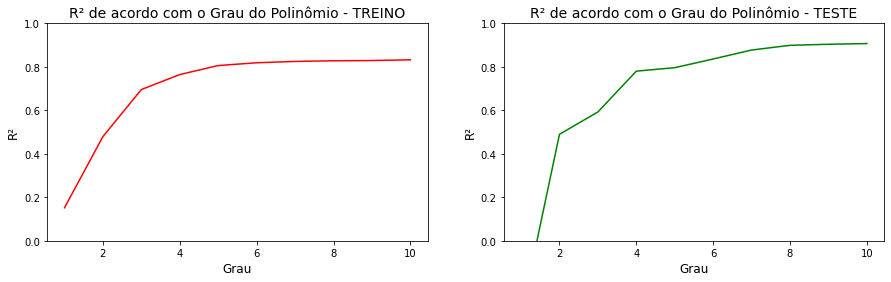

In [18]:
label = np.arange(1, max_poli + 1)
ax = plt.figure(figsize=(15, 4)).subplots(1, 2)

ax[0].set_title("R² de acordo com o Grau do Polinômio - TREINO", fontsize=14)
ax[0].set_xlabel("Grau", fontsize=12)
ax[0].set_ylabel("R²", fontsize=12)
ax[0].set_ylim(0, 1)
ax[0].plot(label, comparacao_reg_df["R² - Treino"], '-r')

ax[1].set_title("R² de acordo com o Grau do Polinômio - TESTE", fontsize=14)
ax[1].set_xlabel("Grau", fontsize=12)
ax[1].set_ylabel("R²", fontsize=12)
ax[1].set_ylim(0, 1)
ax[1].plot(label, comparacao_reg_df["R² - Teste"], '-g')

### 4.2 - Comentários e insights a respeito da análise

- Como pode-se notar em relação ao resultado do R² para as regressões de grau 3, os valores são iguais para o modelo feito de forma 'manual' e também pelo modelo oferecido pela biblioteca do Sklearn. Isso acontece uma vez que os coeficientes que são usados na função preditora dependem de uma equação que fornece um resultado analítico para os valores de teta a qual pode ser vista na figura abaixo.

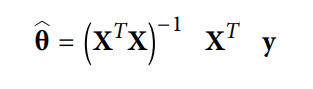

- Esse "teta chapéu" é tal que minimiza a diferença entre o y origial e o y predito pela função preditora.

- Em relação a variação do R² de treino de acordo com o grau do polinômio, pode-se notar que a para a base de dados estudada, a partir do grau 7 o R² melhora de forma contundente, tendendo a estabilizar o seu valor em torno de 0.8 (80% de precisão/ ajuste aos dados).
- Em relação a variação do R² de teste de acordo com o grau do polinômio, entretando, ainda consegue ter um incremento redundante, atingindo uma taxa de ajuste próxima de 90%. A razão disso, certamente, está ligado ao fato de o número de pontos utilizados para teste (assim como para treino) serem baixo, sendo 10 e 40 para teste e treino, respectivamente.